Name: Saleh Abdallah

In [71]:
# Amazon Alexa Customer Review Sentiment Analysis
# Objective: Classify reviews as positive or negative using Random Forest

# TODO: Import necessary libraries
# Hint: You'll need pandas, numpy, matplotlib, seaborn, and various sklearn modules

import pandas as pd
import nltk
from nltk.corpus import stopwords
import string
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import warnings
warnings.filterwarnings('ignore')

In [25]:
# TODO: Load the dataset
# Hint: Use pandas to read the CSV file from your Google Drive
df = pd.read_csv('amazon_alexa.tsv', sep='\t')
df.head()

,rating,date,variation,verified_reviews,feedback
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1
4,5,31-Jul-18,Charcoal Fabric,Music,1


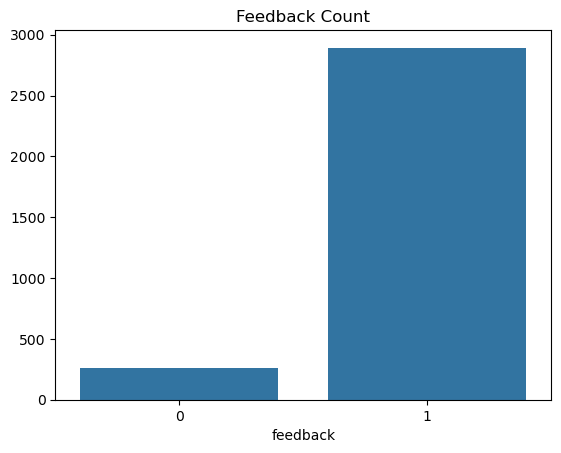

In [11]:
# Data Visualization and Clean Up
# TODO: Visualize the distribution of feedback
# Hint: Use seaborn's countplot function
sns.countplot(x='feedback', data=df)
plt.title('Feedback Count')
plt.ylabel('')
plt.show()

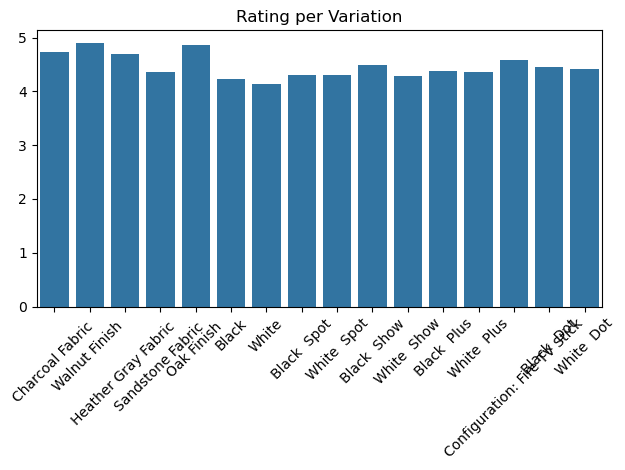

In [21]:
# TODO: Visualize the relationship between variations and ratings
# Hint: Use seaborn's barplot function
sns.barplot(x='variation', y='rating', data=df, ci=None)
plt.title('Rating per Variation')
plt.xlabel('')
plt.ylabel('')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [26]:
# TODO: Drop irrelevant columns
# Hint: Use the drop() method to remove 'date' and 'rating' columns
df.drop(['date', 'rating'], axis=1, inplace=True)
df.head()

,variation,verified_reviews,feedback
0,Charcoal Fabric,Love my Echo!,1
1,Charcoal Fabric,Loved it!,1
2,Walnut Finish,"Sometimes while playing a game, you can answer...",1
3,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1
4,Charcoal Fabric,Music,1


In [28]:
# One-Hot Encoding
# TODO: Perform one-hot encoding on the 'variation' column
# Hint: Use pandas get_dummies() function
le = LabelEncoder()
var_enc = le.fit_transform(df['variation'])

In [29]:
# Text processing function
def text_process(review):
    # Remove punctuation
    nopunc = [char for char in review if char not in string.punctuation]

    # Join the characters again to form the string
    nopunc = ''.join(nopunc)
    
    # Remove any stopwords
    return [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]

In [40]:
df.isnull().sum()


variation           0
verified_reviews    1
feedback            0
dtype: int64

In [43]:
df.dropna(subset=['verified_reviews'], inplace=True)
df.isnull().sum()

variation           0
verified_reviews    0
feedback            0
dtype: int64

In [44]:
# Tokenization (Count Vectorizer)
# TODO: Tokenize the 'verified_reviews' column
# Hint: Use CountVectorizer from sklearn.feature_extraction.text
bow = CountVectorizer(analyzer=text_process).fit(df['verified_reviews'])

In [50]:
# TODO: Combine tokenized reviews with the main dataframe
# Hint: Use pd.concat() to join the dataframes
tokenized_reviews = df['verified_reviews'].apply(text_process)
df['tokenized_reviews'] = tokenized_reviews
df.head()

,variation,verified_reviews,feedback,tokenized_reviews
0,Charcoal Fabric,Love my Echo!,1,"[Love, Echo]"
1,Charcoal Fabric,Loved it!,1,[Loved]
2,Walnut Finish,"Sometimes while playing a game, you can answer...",1,"[Sometimes, playing, game, answer, question, c..."
3,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1,"[lot, fun, thing, 4, yr, old, learns, dinosaur..."
4,Charcoal Fabric,Music,1,[Music]


In [60]:
# Prepare data for modeling
# TODO: Split the data into features (X) and target (y)
# Hint: The target variable is 'feedback'
X = bow.fit_transform(df['verified_reviews'])
y = df['feedback']

In [61]:
# TODO: Split the data into training and testing sets
# Hint: Use train_test_split from sklearn.model_selection
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [62]:
# Train the Random Forest model
# TODO: Create and train the Random Forest model
# Hint: Use RandomForestClassifier from sklearn.ensemble
rf = RandomForestClassifier(n_estimators=100)
rf.fit(X_train,y_train)

RandomForestClassifier()

In [64]:
# Evaluate the model
# TODO: Generate predictions and create confusion matrix
# Hint: Use the predict() method and confusion_matrix from sklearn.metrics
pred = rf.predict(X_test)
cm = confusion_matrix(y_test, pred)

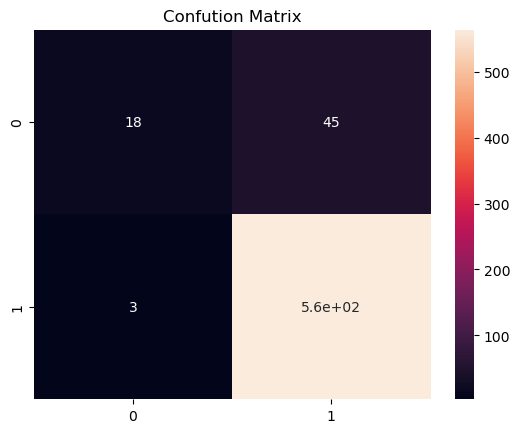

In [65]:
# TODO: Plot confusion matrix
# Hint: Use seaborn's heatmap function
sns.heatmap(cm, annot=True)
plt.title('Confution Matrix')
plt.show()

In [68]:
# TODO: Print classification report
# Hint: Use classification_report from sklearn.metrics
accuracy = accuracy_score(y_test, pred)
print(f"Accuracy: {accuracy:.2f}")  
print(classification_report(y_test, pred)) 

Accuracy: 0.92
              precision    recall  f1-score   support

           0       0.86      0.29      0.43        63
           1       0.93      0.99      0.96       567

    accuracy                           0.92       630
   macro avg       0.89      0.64      0.69       630
weighted avg       0.92      0.92      0.91       630



In [70]:
# Task 8: Analyze Model Performance
# Hint: Use the `score()` method to calculate accuracy for both training and test sets.
# Compare the results and discuss if the model is overfitting or underfitting.

# TODO: Compare training and testing accuracy and discuss model performance

Interpretation of Results

The model has high accuracy of 0.92 but this is mileading taking into consideration that the data is imbalanced as shown in the target variable count plot above. It also performs poorly on the negative feedback class, with a recall of only 0.29. This indicates potential overfitting to the positive fedback class and fails to generalize well to to the other class.